<a href="https://colab.research.google.com/github/nurfnick/Calculus_1/blob/main/Python/Project_Part_4_Newton_Integrals.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Project Part 4 Tricks and Tips

## Dr Jacob's Calculus 1

## Find Roots

In [1]:
from sympy import *
import numpy as np

x = Symbol('x')



Starting with a complicated function, can we find the roots?

In [2]:
f = x**8-x**7-3*x**4-x**2+x-1

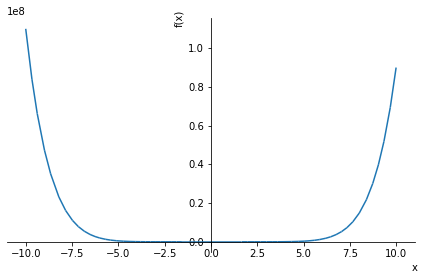

In [ ]:
plot(f,(x,-10,10))

I cannot see any roots yet, let's zoom in to -5 to 5.

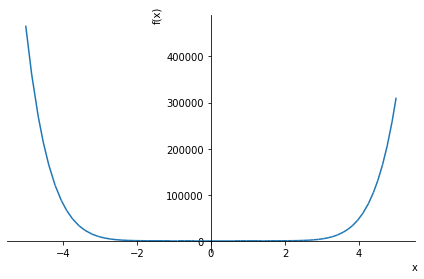

In [ ]:
plot(f,(x,-5,5))

Still no idea!  Zoom in more!

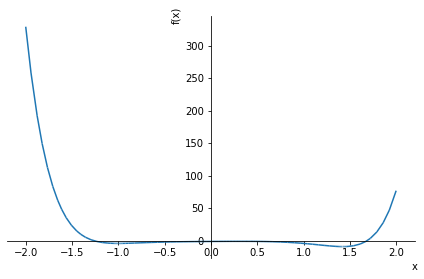

In [ ]:
plot(f,(x,-2,2))

That's better!  Clearly I see one near -1.5 and 1.5.  Let's look and see if I can find others.  ZOOOOOMMM!

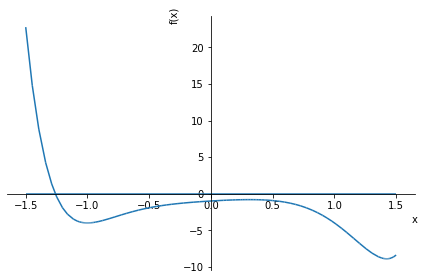

In [ ]:
plot(f,0,(x,-1.5,1.5))

So I think there are 2 roots!  I had a possiblity of 8 so I think I have candidates for all possibilities.  I stuck the 0 in there to keep the graphic centered on 0.

To find them, I'll use `nsolve`  I need to give it a solution near my point!

In [ ]:
nsolve(f,x,1.5)

1.68409845773313

In [ ]:
nsolve(f,x,-1.5)

-1.26035079148018

In [ ]:
nsolve(f,x,1)

1.68409845773313

Opps, already found that one.  Are there any others?  I don't think so!

In [ ]:
nsolve(f,x,.8)

ValueError: ignored

I am going to make a little `for` loop and see if I can find others.

In [ ]:
z = np.linspace(-2,2,100) #just looking between -2 and 2.

for i in z:
  try:
    print(nsolve(f,x,i)) #if this errors it will not display
  except:
    print("Did not find solution")

-1.26035079148018
-1.26035079148018
-1.26035079148018
-1.26035079148018
-1.26035079148018
-1.26035079148018
-1.26035079148018
-1.26035079148018
-1.26035079148018
-1.26035079148018
-1.26035079148018
-1.26035079148018
-1.26035079148018
-1.26035079148018
-1.26035079148018
-1.26035079148018
-1.26035079148018
-1.26035079148018
-1.26035079148018
-1.26035079148018
-1.26035079148018
Did not find solution
Did not find solution
Did not find solution
Did not find solution
1.68409845773313
Did not find solution
Did not find solution
Did not find solution
Did not find solution
Did not find solution
Did not find solution
Did not find solution
Did not find solution
-1.26035079148018
Did not find solution
Did not find solution
Did not find solution
Did not find solution
Did not find solution
1.68409845773313
Did not find solution
Did not find solution
Did not find solution
Did not find solution
Did not find solution
Did not find solution
-1.26035079148018
Did not find solution
Did not find solution
Di

The code above just allows for lots of attempts.  We see though that it only finds those same two solutions...


I might have also explored where the roots were by using the intermediate value theorem.  Here I am looking for negative and positive numbers, then I know the root is in-between those.

In [ ]:
f.subs(x,1.67)

-1.18165379982273

In [ ]:
f.subs(x,1.69)

0.529875431325095

So there must be a root in the interval $(1.67,1.69)$.

## My Attempt at Newton's Method

While I didn't ask you to code Newton's method, I think it is still cool to see it in action!  You need to have a starting value, compute the tangent line at that point, find where that line intercepts the $x$ axis and then repeat.  Let's see if we can code all that!

In [3]:
x0 = Symbol('x0')

tanline = f.diff(x).subs(x,x0)*(x-x0)+f.subs(x,x0)

tanline.subs(x0,1)

8 - 12*x

The above gets the tangent line and below I sovle it for when it is zero.  

In [ ]:
solve(tanline.subs(x0,1),x)[0]

2/3

Now I'll try to run the algorithm multiple times

In [ ]:
possibleRoot = 1

for i in range(5):
  possibleRoot = solve(tanline.subs(x0,possibleRoot),x)[0]
  print(N(possibleRoot))

0.666666666666667
0.322228517469311
-15.6749806590450
-13.7008550361271
-11.9736292800842


I did not succeed here because I did not pick a starting value close enough to the root.  Let's try again: 

In [ ]:
possibleRoot = 1.6

for i in range(10):
  possibleRoot = solve(tanline.subs(x0,possibleRoot),x)[0]
  print(N(possibleRoot))

1.71999935381462
1.68798859396244
1.68414967861235
1.68409846674424
1.68409845773313
1.68409845773312
1.68409845773313
1.68409845773312
1.68409845773312
1.68409845773313


You'll notice I was even able to do more iterations as I picked a starting value closer!

In [ ]:
possibleRoot = -1.8

for i in range(10):
  possibleRoot = solve(tanline.subs(x0,possibleRoot),x)[0]
  print(possibleRoot)

-1.59505066411021
-1.43503975377100
-1.32607315409423
-1.27286705025449
-1.26089585477191
-1.26035187385236
-1.26035079148446
-1.26035079148018
-1.26035079148018
-1.26035079148018


Starting near the root is very important in this method!

What is an example without a picture?



In [5]:
possibleRoots = [1.6]

for i in range(10):
  possibleRoots.append(solve(tanline.subs(x0,possibleRoots[i]),x)[0])

possibleRoots

[1.6,
 1.71999935381462,
 1.68798859396244,
 1.68414967861235,
 1.68409846674424,
 1.68409845773313,
 1.68409845773312,
 1.68409845773313,
 1.68409845773312,
 1.68409845773312,
 1.68409845773313]

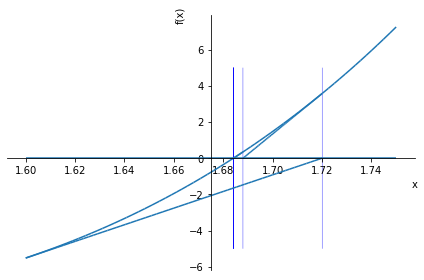

In [19]:
tanLines = [tanline.subs(x0,i) for i in possibleRoots]

p0 = plot(f,0,(x,1.6,1.75), show = False)
for p in range(9):
  p1 = plot(tanLines[p],(x,possibleRoots[p],possibleRoots[p+1]),show = False) 
  p0.append(p1[0])
  p2 = plot_implicit(Eq(x, possibleRoots[p+1]),(x,1.6,1.75),ylim = [0,f.subs(x,possibleRoots[p+1])],show = False)
  p0.append(p2[0])

p0.show()

I think that is the best I can get today...

## Integrals and Reimann Sums

Integrals are not too bad.  Let's examine
$$
\int_{-3}^3 x^7+5 \ dx
$$

In [ ]:
g = x**7+5

g.integrate((x,-3,3))

30

Using the built-in is the easy part.  Now I need to do it by the definition!
$$
\int_a^b f(x)\ dx 
=
\lim_{n\to\infty}
\sum_{i = 1}^n
f(x_i)\Delta x
\quad
\text{where}
\quad
x_i = a+i\Delta x
\quad
\text{and}
\quad
\Delta x = \frac{b-a}n
$$

First I'll do an estimate for $n=20$.

In [ ]:
n = 20


dx = (3- (-3))/n
#xi = -3+i*dx

sum = 0
for i in range(n):
  sum += g.subs(x,-3+i*dx)*dx

sum

-626.100000000000

This estimate is terrible, it kept making me think I did something wrong.  I don't think that is the issue though just that I am using the left end points.  Let's try to make a better estimate.  I'll do $n = 1 000 0$

In [ ]:
n = 10000


dx = (3- (-3))/n
#xi = -3+i*dx

sum = 0
for i in range(n):
  sum += g.subs(x,-3+i*dx)*dx

sum

28.6878000000026

That took a long time to run!  I'll re-write this in a sympy way so that I can take the limit as $n$ tends to infinity.

In [ ]:
n,i = symbols(('n','i'))
dx = 6/n
h = Sum(g.subs(x,-3+i*dx)*dx,(i,1,n))
h

Sum(6*((6*i/n - 3)**7 + 5)/n, (i, 1, n))

The simplify was needed to compute the limit.  Recall, $n$ is tending to infinity!

In [ ]:
h.simplify()

12*Sum(139968*i**7/n**7 - 489888*i**6/n**6 + 734832*i**5/n**5 - 612360*i**4/n**4 + 306180*i**3/n**3 - 91854*i**2/n**2 + 15309*i/n - 1091, (i, 1, n))/n

In [ ]:
from sympy.core.numbers import Infinity

limit(h.simplify(),n,Infinity())

30

## Define an Integral Function

You'll need to define a function that has an integral in it.  Don't fret, it is not bad!

In [ ]:
t = symbols('t')

si = integrate(sin(t)/t,(t,0,x))

si

Si(x)

You should notice this function is actually just built-in! [More info if you want it!](https://docs.sympy.org/latest/modules/functions/special.html#sympy.functions.special.error_functions.Si)